<a href="https://colab.research.google.com/github/chandrakant100/Hand-Written-Text-Detection-ML/blob/master/handwritten_text_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install imutils

In [14]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [15]:
dir = "/content/handwrittencharacterDataset/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [16]:
len(train_data)

140000

In [17]:
val_dir = "/content/handwrittencharacterDataset/Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [18]:
len(val_data)

15209

In [19]:
random.shuffle(train_data)
random.shuffle(val_data)

In [20]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [21]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [22]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [23]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [24]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [25]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [26]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [29]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [30]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=64, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
2188/2188 [==============================] - 293s 133ms/step - loss: 0.6676 - accuracy: 0.7896 - val_loss: 0.3373 - val_accuracy: 0.8911
Epoch 2/50
2188/2188 [==============================] - 282s 129ms/step - loss: 0.3573 - accuracy: 0.8794 - val_loss: 0.2747 - val_accuracy: 0.9132
Epoch 3/50
2188/2188 [==============================] - 290s 133ms/step - loss: 0.3085 - accuracy: 0.8948 - val_loss: 0.2369 - val_accuracy: 0.9214
Epoch 4/50
2188/2188 [==============================] - 278s 127ms/step - loss: 0.2817 - accuracy: 0.9029 - val_loss: 0.2729 - val_accuracy: 0.8977
Epoch 5/50
2188/2188 [==============================] - 279s 127ms/step - loss: 0.2631 - accuracy: 0.9089 - val_loss: 0.2562 - val_accuracy: 0.9068
Epoch 6/50
2188/2188 [==============================] - 274s 125ms/step - loss: 0.2493 - accuracy: 0.9128 - val_loss: 0.2488 - val_accuracy: 0.9066
Epoch 7/50
2188/2188 [==============================] - 269s 123ms/step - loss: 0.2393 - accuracy: 0.9164 - val_

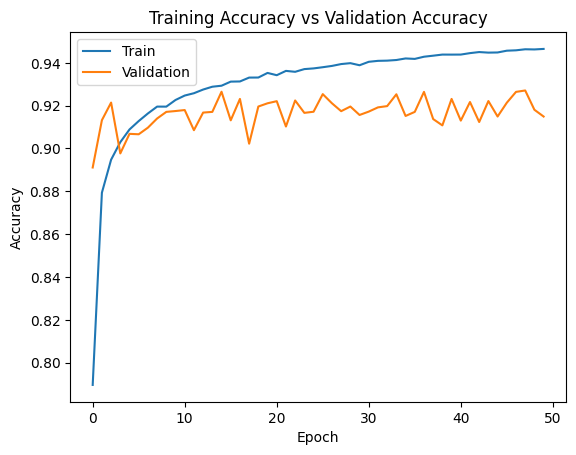

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

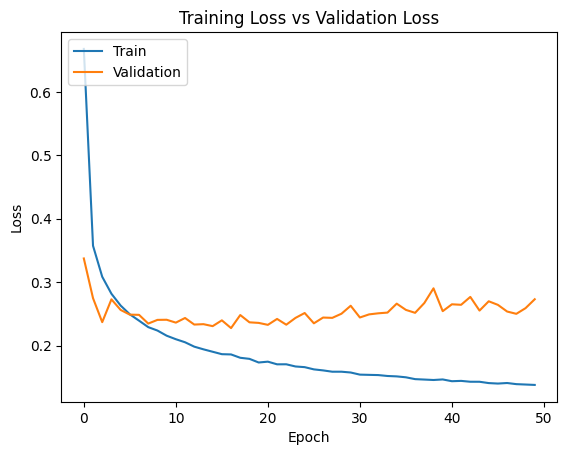

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word.

In [33]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))

    return (cnts, boundingBoxes)

In [40]:
def get_letters(img):
    letters = []
    total_bbox_cordi = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]

    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            print([x,y,w,h])
            single_bbox_cordi = [x,y,w,h]
            total_bbox_cordi.append(single_bbox_cordi)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image, total_bbox_cordi



In [41]:
def get_word(letter):
    word = "".join(letter)
    return word

[10, 15, 14, 17]
1/1 [==============================] - 0s 152ms/step
[26, 16, 10, 16]
1/1 [==============================] - 0s 153ms/step
[44, 15, 11, 17]
1/1 [==============================] - 0s 40ms/step
[62, 19, 11, 13]
1/1 [==============================] - 0s 57ms/step
[82, 15, 12, 18]
1/1 [==============================] - 0s 34ms/step
BTWES
[[10, 15, 14, 17], [26, 16, 10, 16], [44, 15, 11, 17], [62, 19, 11, 13], [82, 15, 12, 18]]


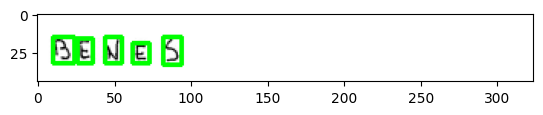

In [42]:
letter,image, total_bbox_cordi = get_letters("/content/handwrittenTextDataset/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[19, 11, 11, 13]
1/1 [==============================] - 0s 77ms/step
[30, 10, 12, 14]
1/1 [==============================] - 0s 152ms/step
[49, 11, 13, 14]
1/1 [==============================] - 0s 82ms/step
[65, 10, 15, 14]
1/1 [==============================] - 0s 88ms/step
[81, 9, 12, 16]
1/1 [==============================] - 0s 241ms/step
LIL0U
[[19, 11, 11, 13], [30, 10, 12, 14], [49, 11, 13, 14], [65, 10, 15, 14], [81, 9, 12, 16]]


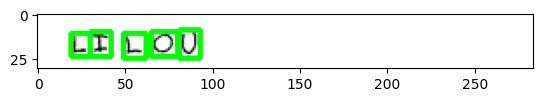

In [44]:
letter,image,total_bbox_cordi = get_letters("/content/handwrittenTextDataset/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[20, 8, 8, 14]
1/1 [==============================] - 0s 42ms/step
[35, 8, 10, 13]
1/1 [==============================] - 0s 48ms/step
[51, 9, 10, 16]
1/1 [==============================] - 0s 42ms/step
[66, 5, 12, 18]
1/1 [==============================] - 0s 45ms/step
[82, 8, 10, 18]
1/1 [==============================] - 0s 49ms/step
[97, 9, 12, 16]
1/1 [==============================] - 0s 41ms/step
[112, 10, 12, 17]
1/1 [==============================] - 0s 38ms/step
JHFFE1X
[[20, 8, 8, 14], [35, 8, 10, 13], [51, 9, 10, 16], [66, 5, 12, 18], [82, 8, 10, 18], [97, 9, 12, 16], [112, 10, 12, 17]]


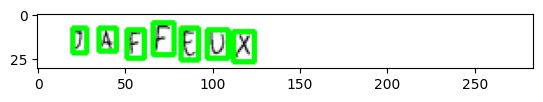

In [46]:
letter,image, total_bbox_cordi = get_letters("/content/handwrittenTextDataset/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[18, 8, 13, 19]
1/1 [==============================] - 0s 159ms/step
[33, 9, 12, 18]
1/1 [==============================] - 0s 201ms/step
[50, 8, 14, 18]
1/1 [==============================] - 0s 206ms/step
[65, 7, 15, 18]
1/1 [==============================] - 0s 247ms/step
RUPP
[[18, 8, 13, 19], [33, 9, 12, 18], [50, 8, 14, 18], [65, 7, 15, 18]]


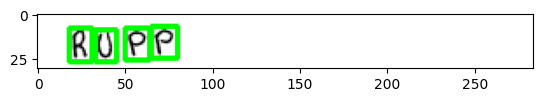

In [48]:
letter,image,total_bbox_cordi = get_letters("/content/handwrittenTextDataset/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[9, 15, 14, 16]
1/1 [==============================] - 0s 63ms/step
[28, 12, 13, 18]
1/1 [==============================] - 0s 44ms/step
[48, 13, 11, 17]
1/1 [==============================] - 0s 45ms/step
[65, 12, 13, 18]
1/1 [==============================] - 0s 54ms/step
[80, 13, 16, 16]
1/1 [==============================] - 0s 42ms/step
[99, 14, 13, 15]
1/1 [==============================] - 0s 46ms/step
[113, 14, 15, 17]
1/1 [==============================] - 0s 103ms/step
[135, 14, 13, 16]
1/1 [==============================] - 0s 64ms/step
[151, 13, 13, 17]
1/1 [==============================] - 0s 87ms/step
VALENTJNF
[[9, 15, 14, 16], [28, 12, 13, 18], [48, 13, 11, 17], [65, 12, 13, 18], [80, 13, 16, 16], [99, 14, 13, 15], [113, 14, 15, 17], [135, 14, 13, 16], [151, 13, 13, 17]]


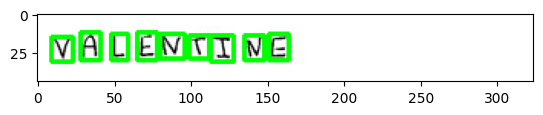

In [63]:
letter,image, total_bbox_cordi = get_letters("/content/handwrittenTextDataset/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

In [64]:
letter

['V', 'A', 'L', 'E', 'N', 'T', 'J', 'N', 'F']

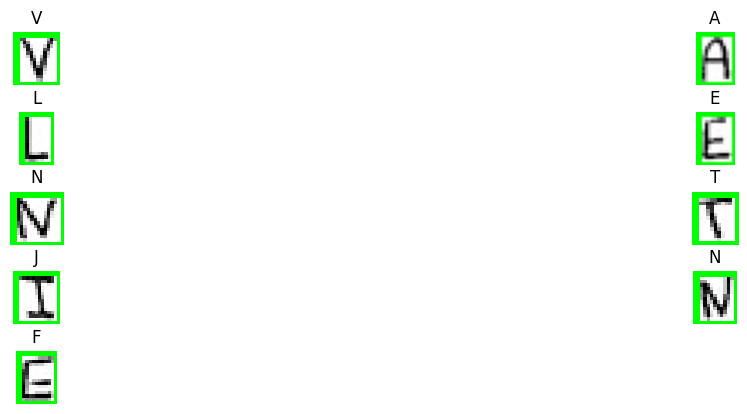

In [65]:
plt.figure(figsize=(15, 10))
for i in range(0,len(total_bbox_cordi)):
    ax = plt.subplot(10, 2, i+1)
    t =total_bbox_cordi[i]
    x_min = t[0]
    y_min = t[1]
    w_min = t[2]
    h_min= t[3]
    cropped_image = image[y_min:y_min+h_min, x_min:x_min+w_min]
    plt.title(letter[i], fontsize=12)
    plt.imshow(cropped_image)
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.5)

In [55]:
!mkdir -p saved_model
model.save('saved_model/my_model')